### Description

This notebook contains strategies derived from the book "Buy The Fear, Sell The Greed" by Larry Connors.

https://www.amazon.in/Buy-Fear-Sell-Greed-Behavioral/dp/0578206501


### Libraries and Data

In [1]:
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
import empyrical as ep

import warnings
warnings.filterwarnings('ignore')

/Users/vkotopoulos/Dev/vkotopoulos/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



### RSI PowerZones

[*********************100%***********************]  1 of 1 completed


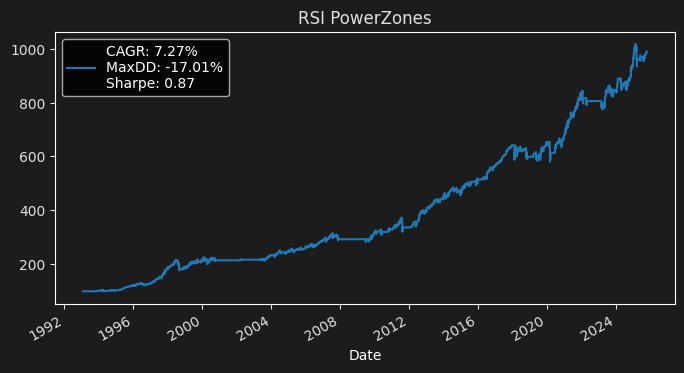

In [23]:
# Loading SPY data
spy_data = yf.download('SPY', interval='1d', period='max')
close = spy_data['Close']

# Computing indicators
sma200 = close.rolling(200).mean().shift(1)
rsi4 = vbt.RSI.run(close, window=4).rsi
rsi4.columns = ['SPY']

# Generating signals
entries = (close > sma200) & (rsi4.vbt.crossed_below(30) | rsi4.vbt.crossed_below(25))
exits = rsi4.vbt.crossed_above(55)

# Run backtest
pf = vbt.Portfolio.from_signals(close, entries, exits)

# Plotting results
CLR_BG     = "#1C1C1C"   # dark grey background
CLR_AX     = "#E0E0E0"   # light grey ticks/labels
plt.style.use('dark_background')
pf.value().plot(color='#1f77b4', figsize=(8, 4))
plt.gca().set_facecolor(CLR_BG)
plt.gcf().set_facecolor(CLR_BG)
plt.legend().set_visible(False)
plt.title('RSI PowerZones', color=CLR_AX)
plt.tick_params(colors=CLR_AX)

# Calculate metrics
sharpe = round(ep.sharpe_ratio(pf.returns(), annualization=252)[0], 2)
cagr = round(ep.cagr(pf.returns(), annualization=252).iloc[0] * 100, 2)
maxdd = round(ep.max_drawdown(pf.returns())[-1] * 100, 2)

# Add metrics to plot legend
plt.legend([f'CAGR: {cagr}%\nMaxDD: {maxdd}%\nSharpe: {sharpe}'])

# Save figure before showing
plt.savefig('./figures/rsi_powerzones.png', bbox_inches='tight', dpi=300)
plt.show()